# 해외(OECD) 국가들의 사고율, 사망율 비교
1. 국가별 인구수와 사고건수
    - 대한민국은 인구수와 사고건수의 회귀식을 웃도는 사고건수를 가짐
2. 국가별 자동차등록대수와 사고건수
    - 대한민국은 자동차등록대수와 사고건수의 회귀식을 웃도는 사고건수를 가짐
3. 사고건수 대비 치사율
    - 프랑스가 월등히 높고 대한민국은 중간쯤 위치
4. 국가별 인구수와 인구10만명당 교통사고 사망자수 비교
    - 대한민국은 인구수 대비 사망자수가 높음
5. 국가별 사고건수와 인구10만명당 교통사고 사망자수 비교
    - 대한민국은 사고건수 대비 사망자수 높음
6. 국가별 자동차등록대수와 인구10만명당 교통사고 사망자수 비교(scatterplot)
    - 대한민국은 자동차등록대수 대비 교통사고 사망자수가 높음
7. 인구 10만명당 교통사고 사망자수에 영향을 미치는 상관관계 히트맵
    - 상관계수의 절대값이 0.3을 넘어가는 정도의 상관관계 요소 확인하지 못함.
8. 국가별 면허취득교육시간과 인구10만명당사망자수 비교
    - 상관계수 -0.12로 상관관계가 있다고 보기 어려움
9. 국가별 면허취득교육시간과 사고건수(1,000명당 사고건수) 비교
    - 상관계수 0.08로 상관관계가 있다고 보기 어려움

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
# 경고문 끄기
import warnings
warnings.filterwarnings('ignore')

# OECD 국가들의 사고율, 사망율 비교
- 사고 건수 등 필요값에 결측치가 있는 국가들은 제거

In [6]:
df = pd.read_excel('./2018_해외국가사고율비교/OECD국가교통사고비교(2018년).xls', header=1)

In [7]:

## 데이터 전처리

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   국가            34 non-null     object 
 1   인구수(천명)       33 non-null     float64
 2   자동차등록대수(천대)   33 non-null     object 
 3   사고건수          33 non-null     object 
 4   사망자수(명)       33 non-null     object 
 5   인구10만명당사망자수   33 non-null     object 
 6   자동차1만대당사망자수   33 non-null     object 
 7   자동차1만대당사망자순위  33 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.2+ KB


In [9]:
df['인구수'] = df['인구수(천명)'] * 1000
df['자동차등록대수'] = df['자동차등록대수(천대)'] * 1000

In [117]:
df['인구10만명당사망자수'].mean().round(2)

5.18

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   국가            34 non-null     object 
 1   인구수(천명)       33 non-null     float64
 2   자동차등록대수(천대)   33 non-null     object 
 3   사고건수          33 non-null     object 
 4   사망자수(명)       33 non-null     object 
 5   인구10만명당사망자수   33 non-null     object 
 6   자동차1만대당사망자수   33 non-null     object 
 7   자동차1만대당사망자순위  33 non-null     object 
 8   인구수           33 non-null     float64
 9   자동차등록대수       33 non-null     object 
dtypes: float64(2), object(8)
memory usage: 2.8+ KB


### G20 국가만 걸러내기 ->표본데이터가 너무 적어지므로 걸러내지 않음

In [11]:
G20_list = ['미국', '캐나다', '사우디아라비아', '호주', '러시아', '인도', '터키', '남아프리카공화국', '브라질', '아르헨티나', '멕시코', '영국', '프랑스', '독일', '이탈리아', '대한민국', '일본', '중국', '인도네시아']
OECD_list = list(df['국가'].values)

# 비교국가 리스트(G20_list와 OECD_list의 교집합)
com_nation_list = list(set(G20_list)&set(OECD_list))
print(com_nation_list)

['프랑스', '호주', '대한민국', '이탈리아', '미국', '일본', '캐나다', '영국', '독일', '터키', '멕시코']


In [12]:
mask = []
for i in df['국가']:
    mask.append(i in com_nation_list)

In [13]:
mask

[True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False]

In [14]:
df_com = df[mask]

In [15]:
df_com

,국가,인구수(천명),자동차등록대수(천대),사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,자동차1만대당사망자순위,인구수,자동차등록대수
0,호주,24898.153,19173.279,-,1136,4.6,0.6,18,24898153.0,19173279.0
1,독일,83124.413,56459,308721,3275,3.9,0.6,19,83124413.0,56459000
6,이탈리아,60627.291,54256.37,172344,3325,5.5,0.6,15,60627291.0,54256370.0
7,일본,127202.190,91468.471,430601,4166,3.3,0.5,27,127202190.0,91468471.0
9,멕시코,126190.782,-,-,-,-,-,-,126190782.0,----------------------------------------------...
17,대한민국,51606.633,26990.456,217148,3781,7.3,1.4,3,51606633.0,26990456.0
22,터키,82340.090,-,186832,6675,8.1,-,-,82340090.0,----------------------------------------------...
23,영국,67141.678,39365.027,128207,1837,2.7,0.5,26,67141678.0,39365027.0
24,미국,327096.263,297043,-,36750,11.2,1.2,4,327096263.0,297043000
27,캐나다,37074.558,25060.399,-,1922,5.2,0.8,11,37074558.0,25060399.0


In [16]:
df = df.replace('-', np.nan)

In [17]:
df.isnull().sum()

국가               0
인구수(천명)          1
자동차등록대수(천대)      6
사고건수            13
사망자수(명)          2
인구10만명당사망자수      2
자동차1만대당사망자수      6
자동차1만대당사망자순위     6
인구수              1
자동차등록대수          1
dtype: int64

In [18]:
df['사고건수'].dropna()

1     308721.0
2      10743.0
3      16951.0
4        868.0
6     172344.0
7     430601.0
11     36846.0
12     11690.0
14     31674.0
17    217148.0
18    102299.0
19     14233.0
20     18033.0
21     38455.0
22    186832.0
23    128207.0
25      1469.0
26     12557.0
29     21889.0
31      4288.0
32     55766.0
Name: 사고건수, dtype: float64

In [19]:
df = df.dropna(subset=['사고건수'])

In [20]:
df['자동차등록대수'] = df['자동차등록대수(천대)'] * 1000

In [21]:
df.reset_index(inplace = True, drop=True)

In [22]:
df_result = df[['국가', '인구수', '자동차등록대수', '사고건수', '사망자수(명)', '인구10만명당사망자수', '자동차1만대당사망자수']]

In [23]:
df_result

,국가,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수
0,독일,83124413.0,56459000.0,308721.0,3275.0,3.9,0.6
1,그리스,10522244.0,9522000.0,10743.0,700.0,6.7,0.7
2,헝가리,9707502.0,4417848.0,16951.0,633.0,6.5,1.4
3,아이슬란드,336712.0,337000.0,868.0,18.0,5.3,0.5
4,이탈리아,60627291.0,54256370.0,172344.0,3325.0,5.5,0.6
5,일본,127202190.0,91468471.0,430601.0,4166.0,3.3,0.5
6,오스트리아,8891383.0,6771395.0,36846.0,409.0,4.6,0.6
7,뉴질랜드,4743131.0,3975359.0,11690.0,377.0,7.9,0.9
8,폴란드,37921585.0,30801000.0,31674.0,2862.0,7.5,0.9
9,대한민국,51606633.0,26990456.0,217148.0,3781.0,7.3,1.4


### 숫자형 데이터들의 형 변환

In [24]:
# 결측치 행 제거
df_result = df_result.dropna()

In [25]:
df_list = ['인구수', '자동차등록대수', '사고건수', '사망자수(명)']
for col in df_list:
    df_result[col] = df_result[col].astype('int')

In [26]:
df_result.reset_index(drop=True, inplace=True)

In [27]:
df_result

,국가,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수
0,독일,83124413,56459000,308721,3275,3.9,0.6
1,그리스,10522244,9522000,10743,700,6.7,0.7
2,헝가리,9707502,4417848,16951,633,6.5,1.4
3,아이슬란드,336712,337000,868,18,5.3,0.5
4,이탈리아,60627291,54256370,172344,3325,5.5,0.6
5,일본,127202190,91468471,430601,4166,3.3,0.5
6,오스트리아,8891383,6771395,36846,409,4.6,0.6
7,뉴질랜드,4743131,3975359,11690,377,7.9,0.9
8,폴란드,37921585,30801000,31674,2862,7.5,0.9
9,대한민국,51606633,26990456,217148,3781,7.3,1.4


In [28]:
df_ = df_result.sort_values(by='인구10만명당사망자수')

### 단순 사고 건수 비교

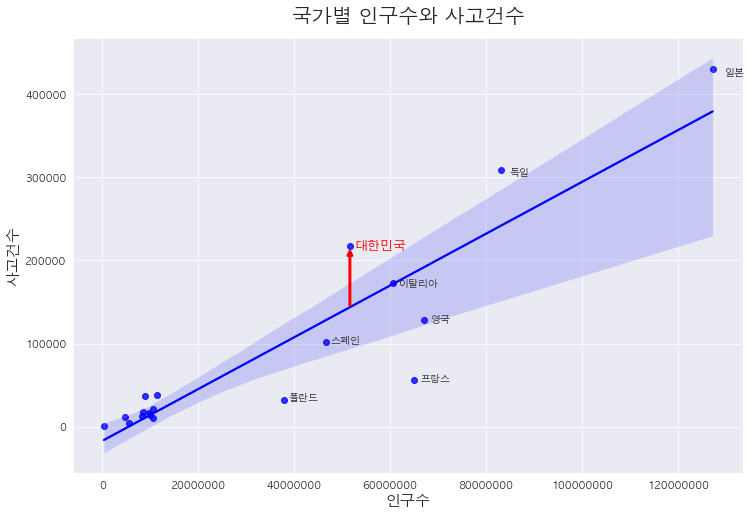

In [71]:
plt.figure(figsize=(12,8))
reg = sns.regplot(x='인구수', y='사고건수', data=df_result, color='blue')
for n in range(len(df_result)):
    if df_result['인구수'][n] > 20000000:
        if df_result['국가'][n] == '대한민국':
            plt.text(df_result['인구수'][n]*1.02, df_result['사고건수'][n]*0.98,
                     df_result['국가'][n], fontsize=13, color='red')
        else:
            plt.text(df_result['인구수'][n]*1.02, df_result['사고건수'][n]*0.98,
                 df_result['국가'][n], fontsize=10)

# 회귀식
z=np.polyfit(df_result['인구수'], df_result['사고건수'], 1) # 기울기와 절편 확인
f=np.poly1d(z)

# 화살표 # 대한민국의 정수형 위치 인덱스가 9이므로 정수형 위치 인덱스 사용함
plt.annotate('',
             xy = (df_result['인구수'][9], df_result['사고건수'][9]), #머리지점
             xytext = (df_result['인구수'][9], f(df_result['인구수'][9])), #꼬리지점
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'red', lw = 3))
plt.title('국가별 인구수와 사고건수', fontsize=20, pad=15)
plt.ylabel('사고건수', fontsize=15)
plt.xlabel('인구수', fontsize=15)

plt.ticklabel_format(style='plain')
# xticks = ['{}'.format(x) + 'K' for x in reg.get_xticks()/1000]
# plt.xticks(xticks)
plt.show()

### 분석결과 : 인구수와 사고건수는 상관 관계를 가진다,
- 대한민국은 그 상관관계를 넘어서는 수준의 인구수 대비 사고 건수가 나타난다.
- 인사이트 풀어서쓰기

# 자동차등록대수와 사고건수의 상관관계

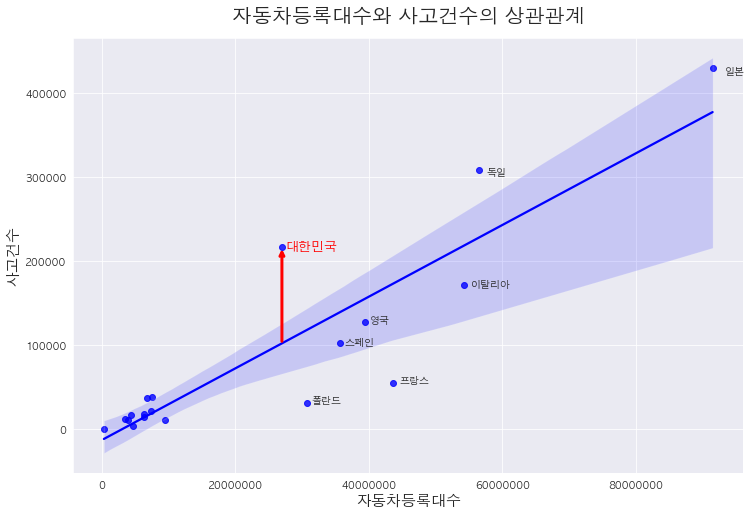

In [72]:
plt.figure(figsize=(12,8))
sns.regplot(x='자동차등록대수', y='사고건수', data=df_result, color='blue')
for n in range(len(df_result)):
    if df_result['자동차등록대수'][n] > 20000000:
        if df_result['국가'][n] == '대한민국':
            plt.text(df_result['자동차등록대수'][n]*1.02, df_result['사고건수'][n]*0.98,
                     df_result['국가'][n], fontsize=13, color='red')
        else:
            plt.text(df_result['자동차등록대수'][n]*1.02, df_result['사고건수'][n]*0.98,
                     df_result['국가'][n], fontsize=10)

# 회귀식
z=np.polyfit(df_result['자동차등록대수'], df_result['사고건수'], 1) # 기울기와 절편 확인
f=np.poly1d(z)

# 화살표 # 대한민국의 정수형 위치 인덱스가 9이므로 정수형 위치 인덱스 사용함
plt.annotate('',
             xy = (df_result['자동차등록대수'][9], df_result['사고건수'][9]), #머리지점
             xytext = (df_result['자동차등록대수'][9], f(df_result['자동차등록대수'][9])), #꼬리지점
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'red', lw = 3))
plt.title('자동차등록대수와 사고건수의 상관관계', fontsize=20, pad=15)
plt.xlabel('자동차등록대수', fontsize=15)
plt.ylabel('사고건수', fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

## 사고건수 대비 사망자수(치사율)

In [73]:
df_result

,국가,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율
0,독일,83124413,56459000,308721,3275,3.9,0.6,1.060828
1,그리스,10522244,9522000,10743,700,6.7,0.7,6.515871
2,헝가리,9707502,4417848,16951,633,6.5,1.4,3.734293
3,아이슬란드,336712,337000,868,18,5.3,0.5,2.073733
4,이탈리아,60627291,54256370,172344,3325,5.5,0.6,1.929281
5,일본,127202190,91468471,430601,4166,3.3,0.5,0.967485
6,오스트리아,8891383,6771395,36846,409,4.6,0.6,1.110026
7,뉴질랜드,4743131,3975359,11690,377,7.9,0.9,3.224979
8,폴란드,37921585,30801000,31674,2862,7.5,0.9,9.035802
9,대한민국,51606633,26990456,217148,3781,7.3,1.4,1.741209


In [74]:
df_result['치사율'] = df_result['사망자수(명)'] / df_result['사고건수'] * 100

In [75]:
df_result

,국가,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율
0,독일,83124413,56459000,308721,3275,3.9,0.6,1.060828
1,그리스,10522244,9522000,10743,700,6.7,0.7,6.515871
2,헝가리,9707502,4417848,16951,633,6.5,1.4,3.734293
3,아이슬란드,336712,337000,868,18,5.3,0.5,2.073733
4,이탈리아,60627291,54256370,172344,3325,5.5,0.6,1.929281
5,일본,127202190,91468471,430601,4166,3.3,0.5,0.967485
6,오스트리아,8891383,6771395,36846,409,4.6,0.6,1.110026
7,뉴질랜드,4743131,3975359,11690,377,7.9,0.9,3.224979
8,폴란드,37921585,30801000,31674,2862,7.5,0.9,9.035802
9,대한민국,51606633,26990456,217148,3781,7.3,1.4,1.741209


In [76]:
df_deathRate = df_result.set_index('국가')

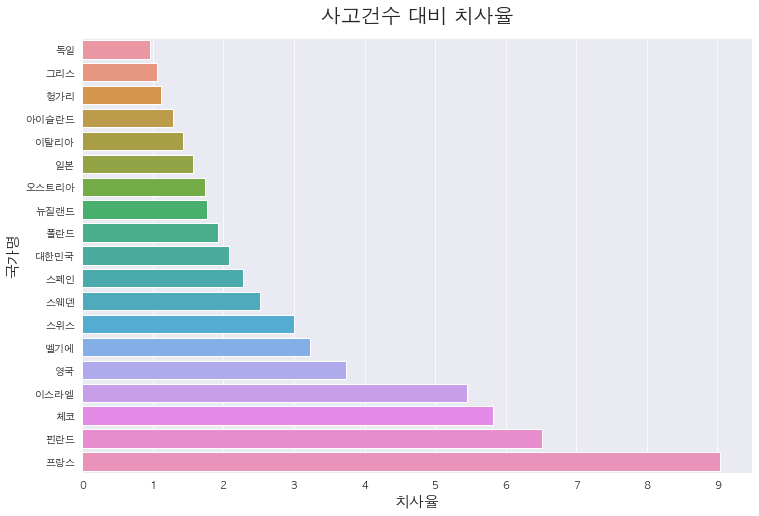

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x ='치사율', y= df_deathRate.index, data=df_deathRate.sort_values(by='치사율'), lw=1)
plt.title('사고건수 대비 치사율', fontsize=20, pad=15)
# 텍스트 작성해보기
# for n in range(len(df_deathRate)):
#     plt.text(x=df_deathRate['치사율'][n]*1.02, y=df_deathRate.index[n],
#              s=df_deathRate['치사율'][n], fontsize=13)
plt.xlabel('치사율', fontsize=15)
plt.ylabel('국가명', fontsize=15)
plt.xticks(range(0, 10, 1))
plt.show()

### 강사님 피드백
- 인구 10만명당 사망자 데이터 다시 그려보기 -> 인사이트 추출
    - 이유? -> 교통체계, 과속, 등등...
- 특정도시 기준(서울, 런던 비교 등 해외 특정 도시와 비교)
    - 인구대비 사고가 유의한가? 회귀식
- 사고가 왜 높은가에 대한 탐색

In [78]:
df_deathRate

,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율
국가,,,,,,,
독일,83124413,56459000,308721,3275,3.9,0.6,1.060828
그리스,10522244,9522000,10743,700,6.7,0.7,6.515871
헝가리,9707502,4417848,16951,633,6.5,1.4,3.734293
아이슬란드,336712,337000,868,18,5.3,0.5,2.073733
이탈리아,60627291,54256370,172344,3325,5.5,0.6,1.929281
일본,127202190,91468471,430601,4166,3.3,0.5,0.967485
오스트리아,8891383,6771395,36846,409,4.6,0.6,1.110026
뉴질랜드,4743131,3975359,11690,377,7.9,0.9,3.224979
폴란드,37921585,30801000,31674,2862,7.5,0.9,9.035802


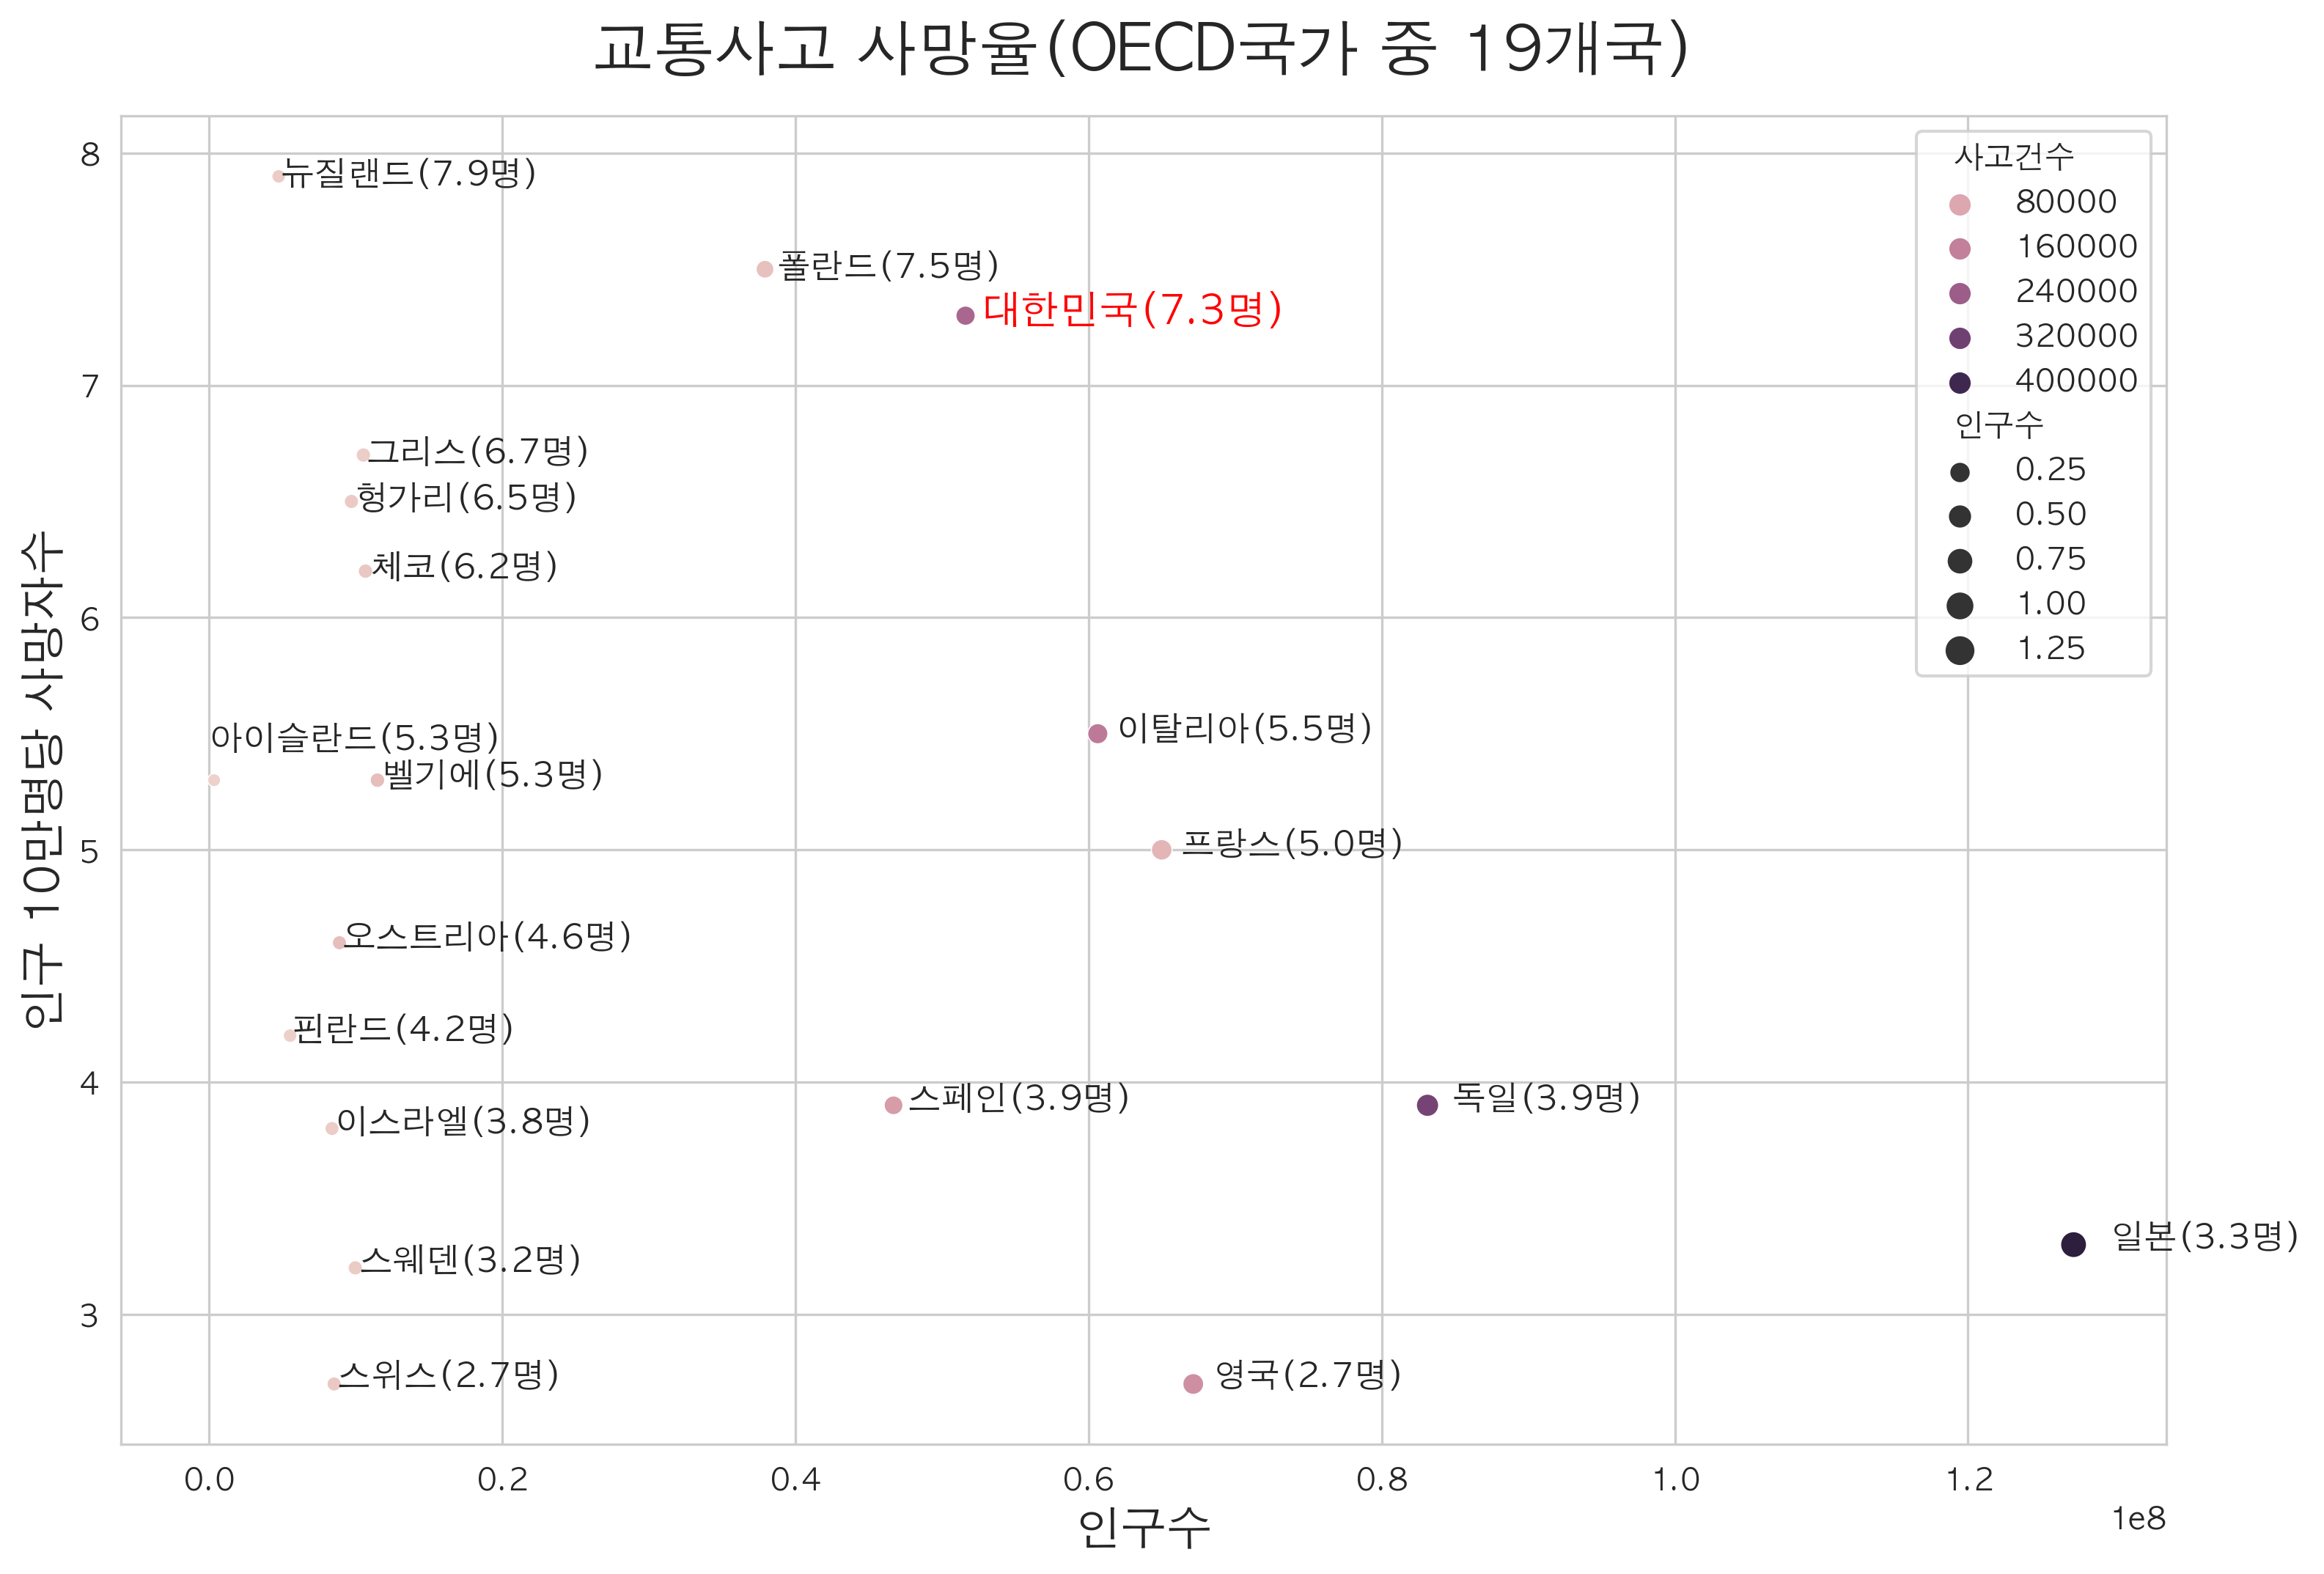

In [119]:
plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams['font.family'] = 'AppleGothic'
sns.scatterplot(x='인구수', y='인구10만명당사망자수', data=df_deathRate, hue='사고건수', size='인구수')
for n in range(len(df_deathRate)):
    if df_deathRate.index[n] == '대한민국':
        plt.text(x=df_deathRate['인구수'][n]*1.02, y=df_deathRate['인구10만명당사망자수'][n]*0.995,
                 s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=13, color = 'red')
    elif df_deathRate.index[n] == '아이슬란드':
        plt.text(x=df_deathRate['사고건수'][n]*0.99, y=df_deathRate['인구10만명당사망자수'][n]*1.025,
                 s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=11)
    else:
        plt.text(x=df_deathRate['인구수'][n]*1.02, y=df_deathRate['인구10만명당사망자수'][n]*0.995,
                s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=11)
plt.title('교통사고 사망율(OECD국가 중 19개국)', fontsize=20, pad=15)
plt.ylabel('인구 10만명당 사망자수', fontsize=15)
plt.xlabel('인구수', fontsize=15)
plt.savefig('교통사고 사망율(OECD국가 중 19개국).jpg')
plt.show()

### 분석결과
- 독일, 일본, 영국은 인구수 대비 교통사고사망율(인구10만명당 사망자수) 낮다.
- 또한 독일, 일본은 사고건수가 많음에도 사망율이 현저히 적다
- 대한민국은 인구수 대비 사망율이 높은 편이며 사고건수 또한 높다.
- 뉴질랜드와 폴란드는 사고건수도 적고 인구수도 적음에도 10만명당 사망자 수가 높은 편이다.
    - 따라서, 인구수와 사고건수 외에 사망율에 영향을 미치는 변수가 존재함을 알 수 있다

- 인구수가 2,000만명 이상인 경우 인구수와 사망율은 음의 상관관계를 그린다.

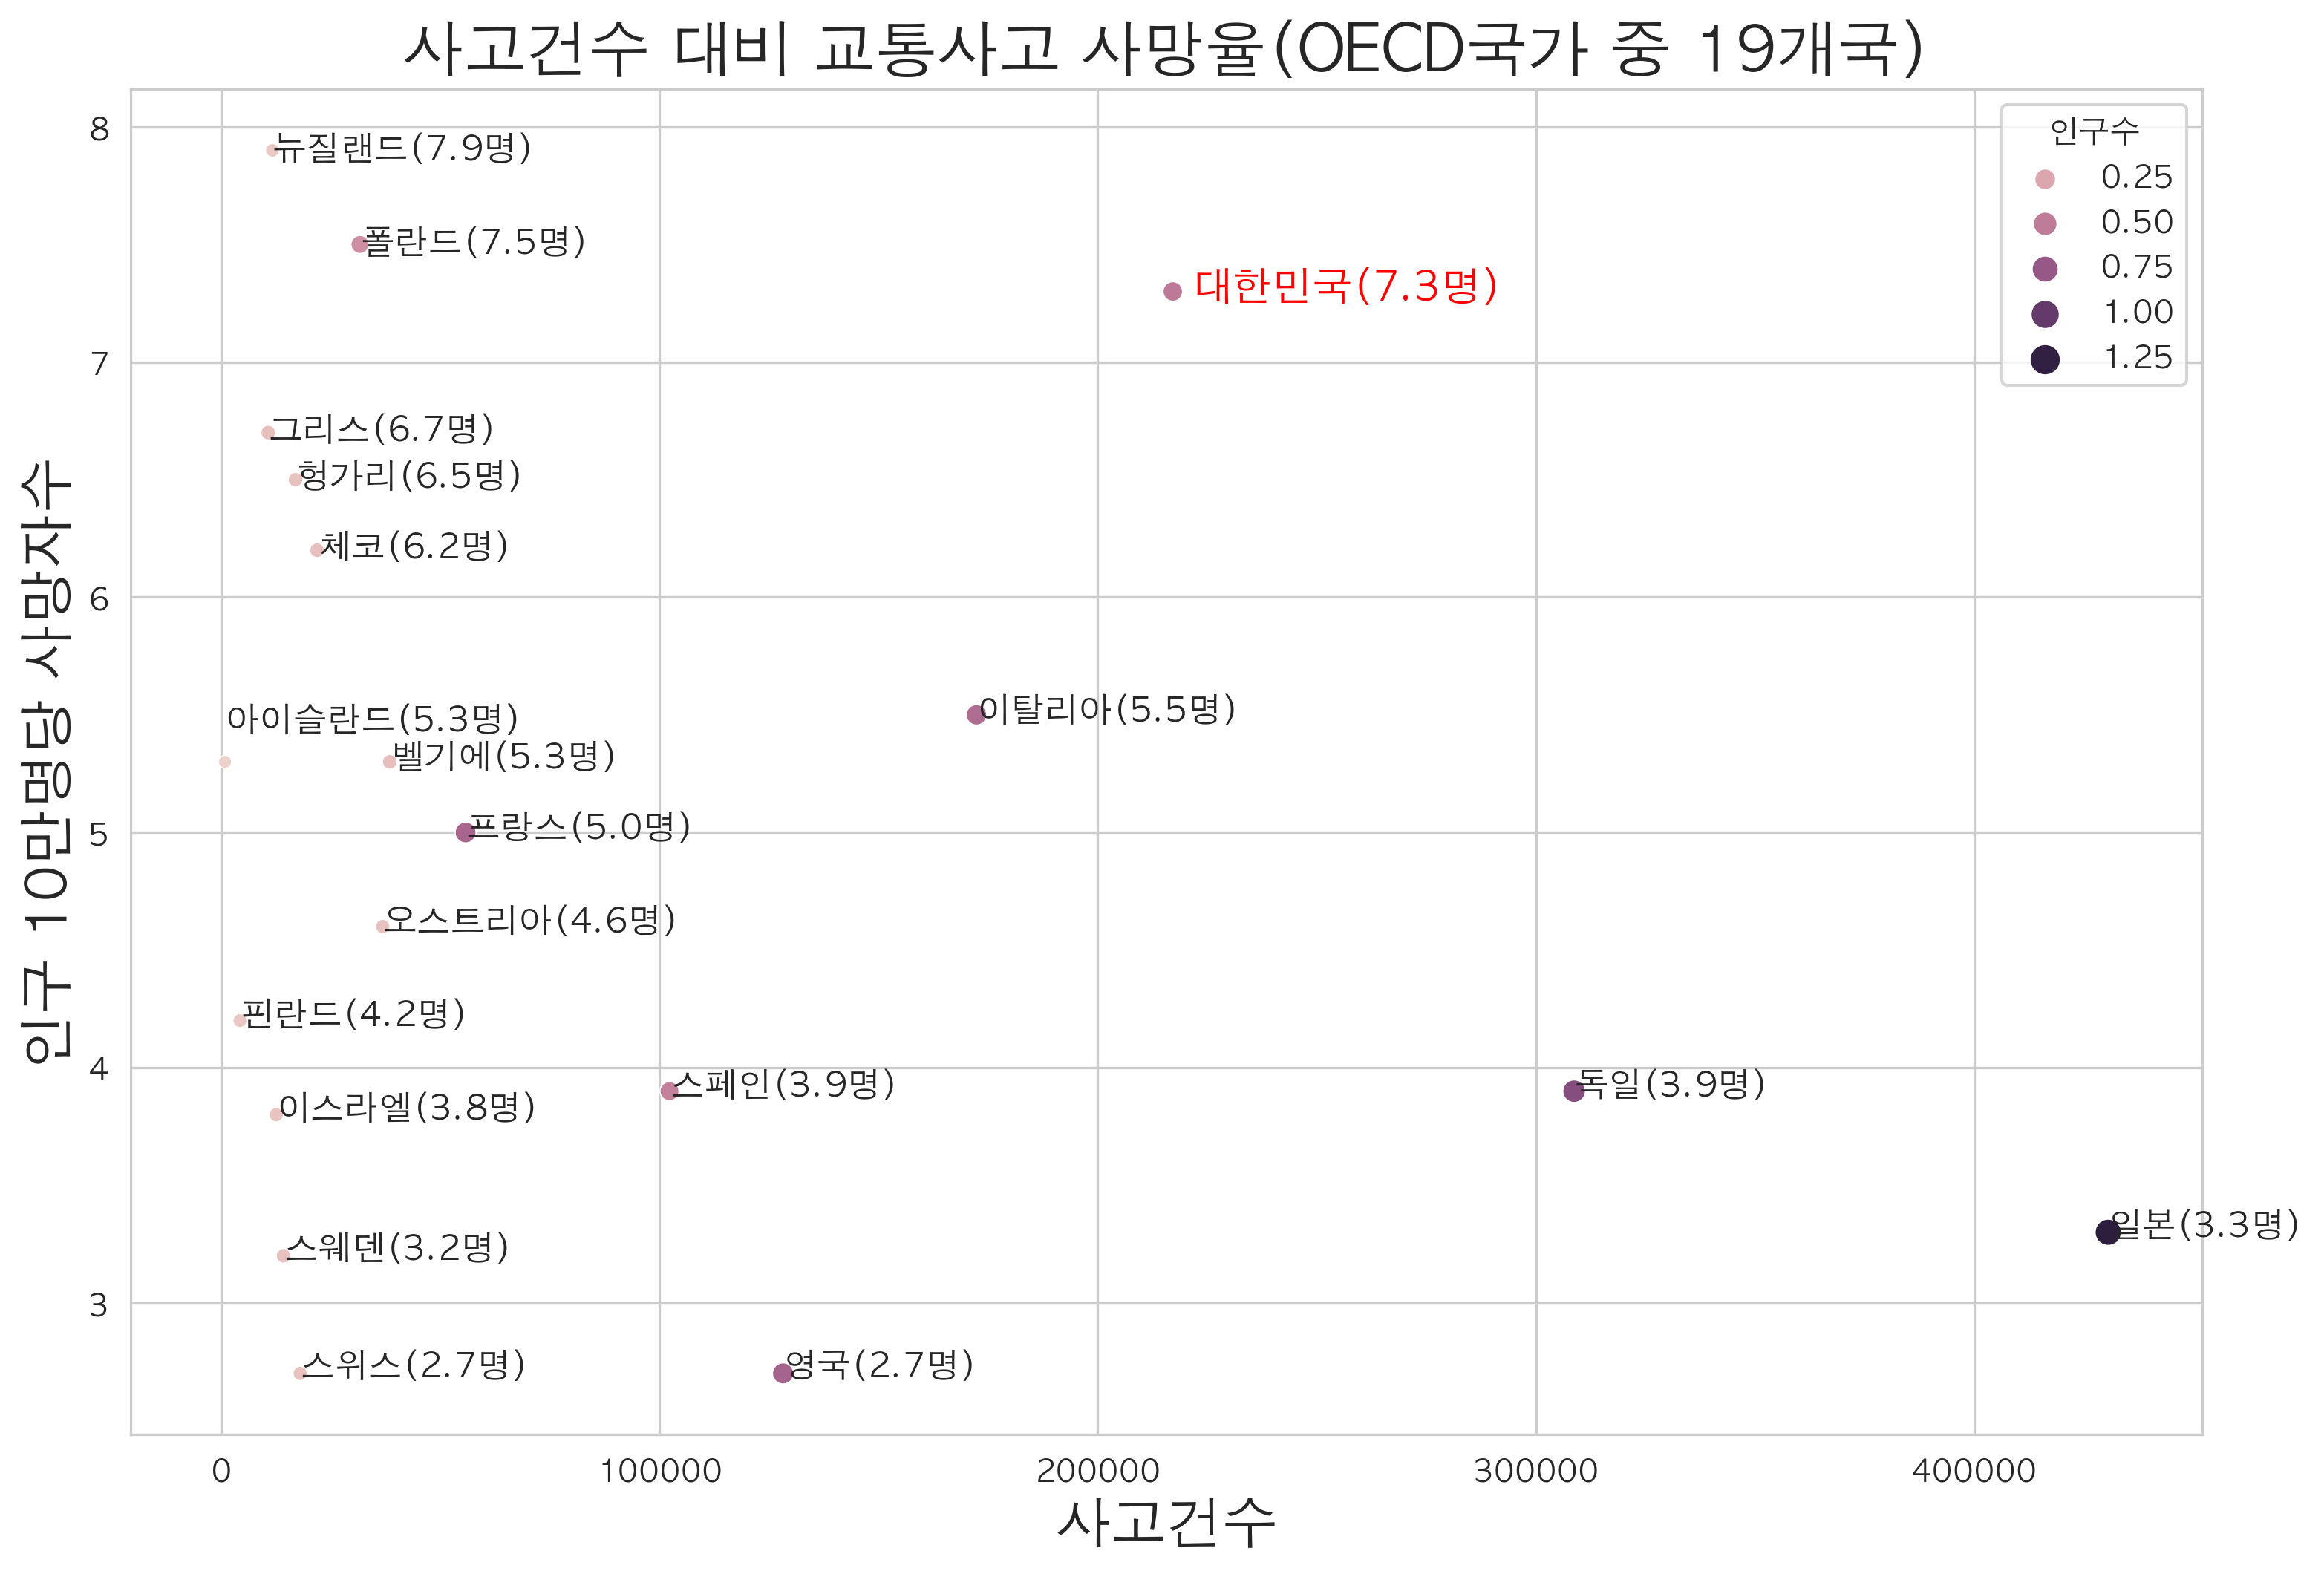

In [120]:
plt.figure(figsize=(12, 8), dpi=300)
sns.scatterplot(x='사고건수', y='인구10만명당사망자수', data=df_deathRate, hue='인구수', size='인구수')
for n in range(len(df_deathRate)):
    if df_deathRate.index[n] == '대한민국':
        plt.text(x=df_deathRate['사고건수'][n]*1.02, y=df_deathRate['인구10만명당사망자수'][n]*0.995,
                 s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=13, color = 'red')
    elif df_deathRate.index[n] == '아이슬란드':
        plt.text(x=df_deathRate['사고건수'][n]*0.99, y=df_deathRate['인구10만명당사망자수'][n]*1.025,
                 s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=11)
    else:
        plt.text(x=df_deathRate['사고건수'][n]+1.02, y=df_deathRate['인구10만명당사망자수'][n]*0.995,
                 s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=11)
plt.title('사고건수 대비 교통사고 사망율(OECD국가 중 19개국)', fontsize=20)
plt.ylabel('인구 10만명당 사망자수', fontsize=18)
plt.xlabel('사고건수', fontsize=18)
plt.savefig('사고건수 대비 교통사고 사망율(OECD국가 중 19개국).jpg')
plt.show()

### 분석결과
- 독일, 일본은 사고건수는 많음에도 사망율이 적다
- 스위스, 영국, 스웨덴, 일본은 사망율이 가장 적은 4개국. -> 영국, 일본은 좌측통행
- 뉴질랜드, 폴란드, 대한민국은 사망율이 가장 높은 3개국이다. -> 뉴질랜드도 좌측통행

- 대한민국은 사고건수도 많고, 사망율도 높다 -> 대책이 필요하다
    - 사고건수가 높으나 사망율이 낮은 독일,일본 그리고 사고 건수가 낮으나 사망율이 높은 뉴질랜드, 폴란드를 비교할 필요가 있어보인다
    - 지역적 특성, 병원, 인구수,
    - __인구수는 독일, 일본은 많고, 뉴질랜드, 폴란드는 적으며 대한민국은 그 중간__
        -
- 탐색 필요한 것들?
    - 면적, 면적대비 인구수
    - 면허취득, 국제운전면허증 사용 가능 여부
    - 운전 수단
    - 차종...?
        - 기업적으로 잘팔리는 차종 혹은 자주 타고다니는 차종(이륜차, 승용차, 승합차 등등)
        - 독삼사, 일제차, 영국
    - 기상여건
    - 병원, 응급의료시설
    - 과속에 대한 문제, 시내 혹은 고속도로의 평균 제한 속도
    - 교통법규 위반건수(범칙금 데이터 등) ==> 범칙금 체계, 3아웃체제, 법집행에 대한 사회적, 행정적 태도
    - 해외의 고령운전자 비율
    -

#### 히트맵 뽑아보기


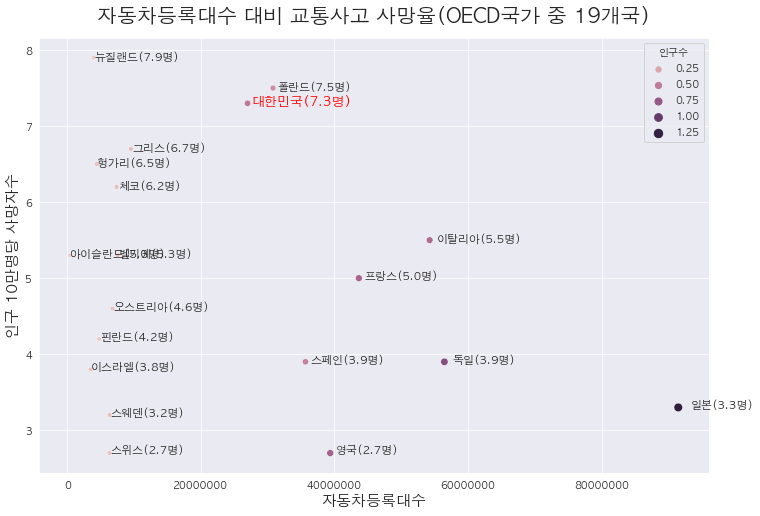

In [81]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='자동차등록대수', y='인구10만명당사망자수', data=df_deathRate, hue='인구수', size='인구수')
for n in range(len(df_deathRate)):
    if df_deathRate.index[n] == '대한민국':
        plt.text(x=df_deathRate['자동차등록대수'][n]*1.02, y=df_deathRate['인구10만명당사망자수'][n]*0.995,
                 s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=13, color = 'red')
    else:
        plt.text(x=df_deathRate['자동차등록대수'][n]*1.02, y=df_deathRate['인구10만명당사망자수'][n]*0.995,
                 s=df_deathRate.index[n] + '(' + str(df_deathRate['인구10만명당사망자수'][n]) +'명' + ')', fontsize=11)
plt.title('자동차등록대수 대비 교통사고 사망율(OECD국가 중 19개국)', fontsize=20, pad=15)
plt.ylabel('인구 10만명당 사망자수', fontsize=15)
plt.xlabel('자동차등록대수', fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

### 분석결과
- 자동차 등록대수 대비 높은 사망율 : 뉴질랜드, 폴란드, 대한민국
- 중간 : 프랑스, 이탈리아, 스페인
- 자동차 등록대수 대비 낮은 사망율 : 일본, 독일, 영국

In [82]:
df_deathRate

,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율
국가,,,,,,,
독일,83124413,56459000,308721,3275,3.9,0.6,1.060828
그리스,10522244,9522000,10743,700,6.7,0.7,6.515871
헝가리,9707502,4417848,16951,633,6.5,1.4,3.734293
아이슬란드,336712,337000,868,18,5.3,0.5,2.073733
이탈리아,60627291,54256370,172344,3325,5.5,0.6,1.929281
일본,127202190,91468471,430601,4166,3.3,0.5,0.967485
오스트리아,8891383,6771395,36846,409,4.6,0.6,1.110026
뉴질랜드,4743131,3975359,11690,377,7.9,0.9,3.224979
폴란드,37921585,30801000,31674,2862,7.5,0.9,9.035802


# 인구10만명당 사망자수에 영향을 미치는 변수 파악하기

In [83]:
df_corr = df_deathRate.corr().loc[:'인구10만명당사망자수', ['인구수', '자동차등록대수', '사고건수', '사망자수(명)', '인구10만명당사망자수']]

In [84]:
df_corr_origin =  df_deathRate.corr().loc[:'인구10만명당사망자수', ['인구수', '자동차등록대수', '사고건수',  '사망자수(명)', '인구10만명당사망자수']]

In [85]:
df_corr

,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수
인구수,1.000000,0.984667,0.916131,0.902236,-0.271798
자동차등록대수,0.984667,1.000000,0.896264,0.894573,-0.250532
사고건수,0.916131,0.896264,1.000000,0.813888,-0.240911
사망자수(명),0.902236,0.894573,0.813888,1.000000,0.052115
인구10만명당사망자수,-0.271798,-0.250532,-0.240911,0.052115,1.000000


# 히트맵 시각화

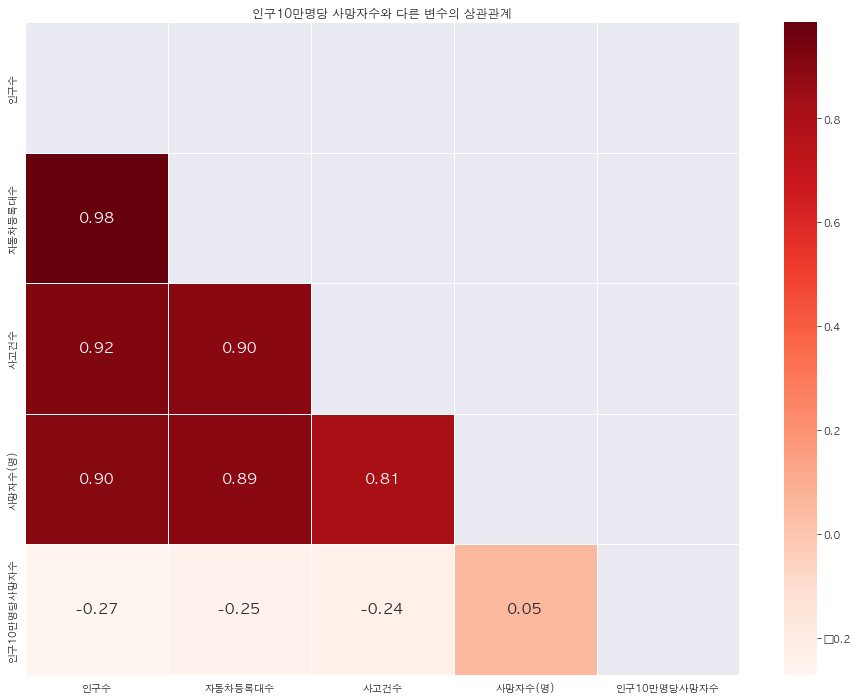

In [86]:
# mask만들기
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,12))

sns.heatmap(df_corr_origin, annot=True, mask=mask, cmap='Reds', linewidths=.5, fmt= '.2f', annot_kws={'size': 15})
plt.title('인구10만명당 사망자수와 다른 변수의 상관관계')
plt.show()

# 분석결과
- 인구 10만명당 사망자수와 다른 변수들의 상관관계를 살펴보니, 모두 절대값 0.3이하로 상관관계가 있다고 보기 어렵다.
- 인구 10만명당 사망자수에 영향을 미치는 다른 변수가 있을 것으로 판단된다.

In [87]:
df_deathRate

,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율
국가,,,,,,,
독일,83124413,56459000,308721,3275,3.9,0.6,1.060828
그리스,10522244,9522000,10743,700,6.7,0.7,6.515871
헝가리,9707502,4417848,16951,633,6.5,1.4,3.734293
아이슬란드,336712,337000,868,18,5.3,0.5,2.073733
이탈리아,60627291,54256370,172344,3325,5.5,0.6,1.929281
일본,127202190,91468471,430601,4166,3.3,0.5,0.967485
오스트리아,8891383,6771395,36846,409,4.6,0.6,1.110026
뉴질랜드,4743131,3975359,11690,377,7.9,0.9,3.224979
폴란드,37921585,30801000,31674,2862,7.5,0.9,9.035802


In [88]:
df_deathRate.index

Index(['독일', '그리스', '헝가리', '아이슬란드', '이탈리아', '일본', '오스트리아', '뉴질랜드', '폴란드',
       '대한민국', '스페인', '스웨덴', '스위스', '벨기에', '영국', '이스라엘', '체코', '핀란드', '프랑스'],
      dtype='object', name='국가')

## 면허취득시 필요한 교육 시간과 인구10만명당사망자수의 상관관계

In [89]:
# 빈 컬럼 추가
df_deathRate['면허취득교육시간'] = pd.Series()

In [90]:
# 키=국가명, 값=교육시간으로 하는 dictionary 만들어서 반복문으로 컬럽에 값 추가
nat_edutime_dict = {'대한민국': 13,
                    '폴란드': 60,
                    '프랑스': 20,
                    '이탈리아': 6,
                    '일본': 120,
                    '독일': 34,
                    }

In [91]:
for nation, time in nat_edutime_dict.items():
    df_deathRate.loc[nation, '면허취득교육시간'] = time

In [92]:
df_deathRate

,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율,면허취득교육시간
국가,,,,,,,,
독일,83124413,56459000,308721,3275,3.9,0.6,1.060828,34.0
그리스,10522244,9522000,10743,700,6.7,0.7,6.515871,NaN
헝가리,9707502,4417848,16951,633,6.5,1.4,3.734293,NaN
아이슬란드,336712,337000,868,18,5.3,0.5,2.073733,NaN
이탈리아,60627291,54256370,172344,3325,5.5,0.6,1.929281,6.0
일본,127202190,91468471,430601,4166,3.3,0.5,0.967485,120.0
오스트리아,8891383,6771395,36846,409,4.6,0.6,1.110026,NaN
뉴질랜드,4743131,3975359,11690,377,7.9,0.9,3.224979,NaN
폴란드,37921585,30801000,31674,2862,7.5,0.9,9.035802,60.0


In [93]:
df_deathRate.index

Index(['독일', '그리스', '헝가리', '아이슬란드', '이탈리아', '일본', '오스트리아', '뉴질랜드', '폴란드',
       '대한민국', '스페인', '스웨덴', '스위스', '벨기에', '영국', '이스라엘', '체코', '핀란드', '프랑스'],
      dtype='object', name='국가')

In [94]:
# 면허 취득 교육시간 값만 있는 국가만 가지고 새로운 df 생성
df_edutime = df_deathRate.loc[nat_edutime_dict.keys(), ]

In [95]:
df_edutime.sort_values('면허취득교육시간')

,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율,면허취득교육시간
국가,,,,,,,,
이탈리아,60627291,54256370,172344,3325,5.5,0.6,1.929281,6.0
대한민국,51606633,26990456,217148,3781,7.3,1.4,1.741209,13.0
프랑스,64990512,43652609,55766,3248,5.0,0.7,5.824337,20.0
독일,83124413,56459000,308721,3275,3.9,0.6,1.060828,34.0
폴란드,37921585,30801000,31674,2862,7.5,0.9,9.035802,60.0
일본,127202190,91468471,430601,4166,3.3,0.5,0.967485,120.0


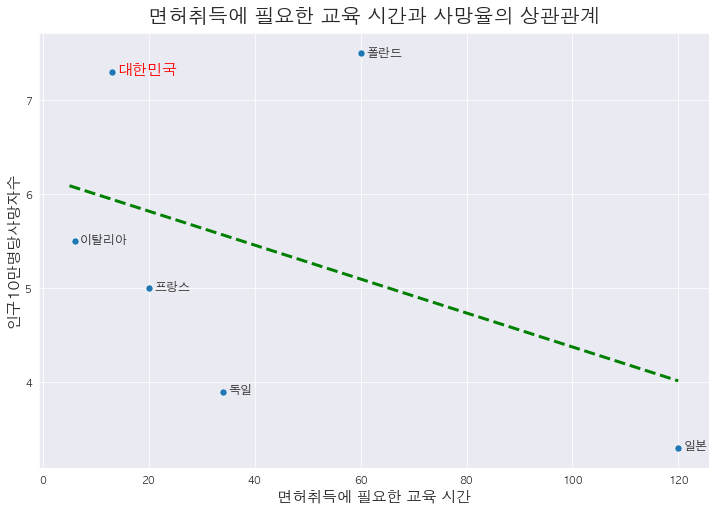

In [96]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='면허취득교육시간', y='인구10만명당사망자수', data=df_edutime, s=50)
for n in range(len(df_edutime)):
    if df_edutime.index[n] == '대한민국':
        plt.text(df_edutime['면허취득교육시간'][n]+1, df_edutime['인구10만명당사망자수'][n]*0.995,
                 df_edutime.index[n], fontsize=15, color='red')
    else:
        plt.text(df_edutime['면허취득교육시간'][n]+1, df_edutime['인구10만명당사망자수'][n]*0.995,
             df_edutime.index[n], fontsize=12)

# 추세선 시각화 하기 위해 1차식 구함
pf = np.polyfit(df_edutime['면허취득교육시간'], df_edutime['인구10만명당사망자수'], 1)
f1 = np.poly1d(pf)
fx = np.linspace(5, 120, num=100)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

plt.title('면허취득에 필요한 교육 시간과 사망율의 상관관계', fontsize=20, pad=10)
plt.xlabel('면허취득에 필요한 교육 시간', fontsize=15)
plt.ylabel('인구10만명당사망자수', fontsize=15)
plt.show()

In [97]:
df_edutime.corr()

,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,치사율,면허취득교육시간
인구수,1.000000,0.953338,0.868403,0.744888,-0.892233,-0.607695,-0.618537,0.711613
자동차등록대수,0.953338,1.000000,0.785486,0.616804,-0.885960,-0.767436,-0.542845,0.702407
사고건수,0.868403,0.785486,1.000000,0.813340,-0.698686,-0.307401,-0.843347,0.548739
사망자수(명),0.744888,0.616804,0.813340,1.000000,-0.449286,0.005895,-0.729195,0.469889
인구10만명당사망자수,-0.892233,-0.885960,-0.698686,-0.449286,1.000000,0.806643,0.571764,-0.446102
자동차1만대당사망자수,-0.607695,-0.767436,-0.307401,0.005895,0.806643,1.000000,0.150825,-0.396303
치사율,-0.618537,-0.542845,-0.843347,-0.729195,0.571764,0.150825,1.000000,-0.031256
면허취득교육시간,0.711613,0.702407,0.548739,0.469889,-0.446102,-0.396303,-0.031256,1.000000


## 분석결과
- 면허취득에 필요한 교육 시간과 인구10만명당사망자수의 상관계수는 -0.446으로 음의 상관관계가 있다.
    - 따라서, 면허 취득에 필요한 교육시간이 증가할 수록 인구10만명당사망자수는 감소하는 경향을 보인다.
- 다만, 표본이 6개국밖에 되지 않아 추가 조사가 필요해보이고, 면허취득에 필요한 교육 시간 데이터를 확보하는 데는 다소 어려움이 있을 것으로 예상된다

# 면허 교육 시간과 인구 10만명당 사망자수 다시 그리기
drop으로 잘라내지 않고 10만명당 사망자수와 면허 교육시간만 비교하기

In [98]:
temp_df = pd.read_excel('./2018_해외국가사고율비교/OECD국가교통사고비교(2018년).xls', header=1)

In [99]:
temp_df.set_index('국가', inplace=True)

In [100]:
temp_df.rename(index={'터키': '튀르키예(터키)'}, inplace=True)

In [1]:
nat_all_edutime_dict = {'대한민국': 13,
                        '폴란드': 60,
                        '프랑스': 20,
                        '이탈리아': 6,
                        '일본': 120,
                        '독일': 34,
                        '헝가리': 30,
                        '오스트리아': 50,
                        '핀란드': 22,
                        '체코': 64,
                        '스위스': 18,
                        '벨기에': 20,
                        '튀르키예(터키)': 42,
                    }

In [2]:
for nation, time in nat_all_edutime_dict.items():
    temp_df.loc[nation, '면허취득교육시간'] = time

NameError: name 'temp_df' is not defined

In [ ]:
temp_df

In [ ]:
edu_time_all = temp_df.dropna(axis=0, subset=['면허취득교육시간'])

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)
sns.scatterplot(x='면허취득교육시간', y='인구10만명당사망자수', data=edu_time_all, s=50)
for n in range(len(edu_time_all)):
    if edu_time_all.index[n] == '대한민국':
        plt.text(edu_time_all['면허취득교육시간'][n]+1, edu_time_all['인구10만명당사망자수'][n]*0.995,
                 edu_time_all.index[n], fontsize=15, color='red')
    else:
        plt.text(edu_time_all['면허취득교육시간'][n]+1, edu_time_all['인구10만명당사망자수'][n]*0.995,
                 edu_time_all.index[n], fontsize=12)

# 추세선 시각화 하기 위해 1차식 구함
pf = np.polyfit(edu_time_all['면허취득교육시간'].astype('float'), edu_time_all['인구10만명당사망자수'].astype('float'), 1)
f1 = np.poly1d(pf)
fx = np.linspace(5, 120, num=100)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='b')

plt.title('면허취득에 필요한 교육 시간과 사망율의 상관관계', fontsize=20, pad=10)
plt.xlabel('면허취득에 필요한 교육 시간', fontsize=15)
plt.ylabel('인구10만명당사망자수', fontsize=15)
plt.xticks(np.arange(0, 131, 10))
plt.yticks(np.arange(3, 9, 0.5))
plt.savefig('면허취득에 필요한 교육 시간과 사망율의 상관관계.jpg')
plt.show()

In [ ]:
np.corrcoef(edu_time_all['면허취득교육시간'].astype('float'), edu_time_all['인구10만명당사망자수'].astype('float'))

### 분석 결과
- 면허 취득 교육 시간과, 인구 10만명당 사망율의 상관계수는 -1.23으로, 상관 관계가 있다고 보기 어렵다.
- 다만, 우리나라의 면허 취득에 필요한 교육시간이 다른 국가들에 비해 현저히 적은 것은 확인된다.
- 위 분석은 면허 시험의 난이도는 측정하지 않고, 단순 교육 시간만 비교한 것이다.


# 사고건수와 면허취득 교육시간 비교
- 사고건수를 인구수로 나워 1천명당 사고건수로 스케일링하기
-

In [ ]:
edu_time_all['1천명 당 사고건수'] = edu_time_all['사고건수'] / edu_time_all['인구수(천명)']

In [ ]:
edu_time_all

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='면허취득교육시간', y='1천명 당 사고건수', data=edu_time_all, s=50, hue='인구수(천명)')
for n in range(len(edu_time_all)):
    if edu_time_all.index[n] == '대한민국':
        plt.text(edu_time_all['면허취득교육시간'][n]+1, edu_time_all['1천명 당 사고건수'][n]*0.995,
                 edu_time_all.index[n], fontsize=15, color='red')
    else:
        plt.text(edu_time_all['면허취득교육시간'][n]+1, edu_time_all['1천명 당 사고건수'][n]*0.995,
                 edu_time_all.index[n], fontsize=12)

# 추세선 시각화 하기 위해 1차식 구함
pf = np.polyfit(edu_time_all['면허취득교육시간'].astype('float'), edu_time_all['1천명 당 사고건수'].astype('float'), 1)
f1 = np.poly1d(pf)
fx = np.linspace(5, 120, num=100)
# plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') 회귀식을 그래프에 그리는 것이 필요한가 ?

plt.title('면허취득에 필요한 교육 시간과 사고건수의 상관관계', fontsize=20, pad=10)
plt.xlabel('면허취득에 필요한 교육 시간', fontsize=15)
plt.ylabel('1천명당 사고건수', fontsize=15)
plt.xticks(np.arange(0, 131, 5))
# plt.yticks(np.arange(3, 8, 0.5))
plt.show()

In [ ]:
np.corrcoef(edu_time_all['면허취득교육시간'].astype('float'), edu_time_all['1천명 당 사고건수'].astype('float'))

In [ ]:
# 평균 교육 시간
mean_edu_time = np.mean(edu_time_all['면허취득교육시간'])
howmany = len(edu_time_all['면허취득교육시간'])
print(f'{howmany}개국의 평균교육 시간은 {mean_edu_time:.2f} 시간 입니다.')

### 분석결과
- 면허취득에 필요한 교육 시간과 1천명 당 사고 건수의 상관계수는 0.08로 상관관계가 거의 없다.
- 그렇다면, 세계 각국의 교통사고로 인한 사망율(인구10만명당 사망자수)는 다른 복합적인 변수들에 의해 변화한다고 볼 수 있다.